# WELCOME TO NEUROSTEM WORKSHOP 2024
[insert NEUROSTEM logo here, if there is one???????]


This document will give you hands-on experience in what **neuroscientists** do when analysing Electroencephalography(EEG) data!



## Introduction

What you will learn from this workshop: 

1. How to configure Python so that it can analyse EEG dataset
2. How to load the data
3. How to manipulate the data
4. How to visualise the data
5. How to interpret the data

Note: This document you are reading is called a [Jupyter notebook](https://jupyter.org/). It is not a static document like a Microsoft Word document, but rather an interactive document that allows us to write and execute code within it!


### Coding Warm UP! 

Let's warm up! In the below empty cell called "TESTING CELL" (where code can be executed)
- Make a program that says "Hello World" (For example, type `print("Hello World")`)

- Do some simple but difficult maths (For example, type `512 * 15678 * 1.75`)

To execute the code, select the cell of interest then click on the "play" symbol (inside red circle) at the top of your document as seen in the below screenshot.

![Congratz!](pics/jpy_notebook_help.png)

In [1]:
################################# TESTING CELL ################################
print("Hello World")
512 * 15678 * 1.75


Hello World


14047488.0

![Congratz!](notebook_gif/Tay_tay_congrats.gif)

Congratulations, you just wrote a simple program in Python language! Now let's move on to the fun stuff! 😊

## Learning Objective 1: Configuring Python (Loading the packages/dependecies)

Python is a very versatile and powerful programming tool. It can be used to program robots, create games, music and even art! However, it is very important that Python is correctly configured for the right job.

For us, as neuroscientists, Python needs to be configured with neuroscientists tools so that it's useful to us.

To do so we can run below code in the following cell ("CELL 1"):
 - `import mne` : this line of code configures Python with the specialised tools so that it can work with EEG data. 
 - `import numpy as np` : this allows Python to do even more complicated Mathematical operations which will help us when manipulating the EEG data
 - `import matplotlib.pyplot as plt` : this allows Python to plot the data on a graph
 - `import os` : this allows Python to access where the EEG data will be stored and loaded from



In [34]:
################################# CELL 1 ################################

# import .....


# SOLUTION  (DELETE BEFORE EVENT)
import mne
import numpy as np
import matplotlib.pyplot as plt
import os

## Learning Objective 2 : Load Up the EEG Data

Well done, now Python is tooled up to do neuroscience work! For Python to be useful though, we need to have EEG data that it can analyzed.
Fortunately, a sample EEG data has been provided for you.

To access/load this data, your task is to modify the code in "CELL 2".

Hint:
- `raw = mne.io.read_raw_fif(file_location)`: this code will find the sample data defined in the file location variable we call here `file_location`, read the data and then store the data into a variable called `raw`
- In our case, the file location's variable has been defined as `sample_data_location`
- Modify the line `raw = mne.io.read_raw_fif(............)` so that it can access and load our sample data


In [39]:
################################# CELL 2 ################################

sample_data_location = os.path.join(
    "sample_data", "sample_audvis_raw.fif"
) 

# BELOW is for Students
# raw = mne.io.read_raw_fif(................)

# SOLUTION (DELETE BEFORE EVENT)
raw = mne.io.read_raw_fif(sample_data_location)


Opening raw data file sample_data/sample_audvis_raw.fif...
    Read a total of 3 projection items:
        PCA-v1 (1 x 102)  idle
        PCA-v2 (1 x 102)  idle
        PCA-v3 (1 x 102)  idle
    Range : 25800 ... 61837 =     42.956 ...   102.956 secs
Ready.


Great job! Now that we've loaded the data, it's time to dive into the exciting part: understanding what we're dealing with. Why is this so crucial, you might wonder? Imagine this scenario: What if we accidentally loaded the wrong data, or worse, what if the data is corrupted or incomplete?
We definitely don't want to spend hours analyzing data only to realize later that it was incorrect or flawed! Let's make sure we're on the right track from the get-go.


To check we can print the quick summary details of the data by seeing the details of the `raw` variable. Just type in `raw` in "CELL 3", execute the cell.

In [36]:
################################# CELL 3 ################################
raw

Measurement date,"December 03, 2002 19:01:10 GMT"
Experimenter,MEG
Participant,Unknown
Digitized points,146 points
Good channels,"203 Gradiometers, 102 Magnetometers, 9 Stimulus, 59 EEG, 1 EOG"
Bad channels,"MEG 2443, EEG 053"
EOG channels,EOG 061
ECG channels,Not available
Sampling frequency,600.61 Hz
Highpass,0.10 Hz
Lowpass,172.18 Hz


Take a moment to look at the data summary table provided. This table gives us a snapshot of the main characteristics of our dataset.

Do you notice any irregularities or anomalies in the data? If so, make a note of them. These could be potential concerns that need to be addressed or explored further.
Share your findings with your peers or teacher, see what they have to say as well!

## Learning Objective 3 : EEG Data Manipulation

Well done on getting to this part of the workshop!

Now that we've got our hands on the data, it's time to manipulate the data and remove any pesky irregularities before we can plot it.
If you had notice, there are several points you could infer from the data summary:
1. The data is about 1 minute long. To accelerate analysis, it would be wise for us to crop the data so that it is 40 seconds long. 
2. The data is consisted of informations from several source channels (that is Gradiometers, Magnetometers, Stimulis, EEG and EOG). However, we want only the EEG channels. 
3. Moreover, there are bad channels that also had been detected. We need to remove these channels before we can plot the data.


To complete this objective, your task is to modify the code in "CELL 4".

Hint:
- `raw.crop(tmax=5)`: this code will cut fown the length of the data into whatever value has been specified for `tmax`. For this example, we have cut the data to only show us the first 5 seconds
- `raw.drop_channels(["EEG 111"])` : this code will remove the specified channel. For this example, we are removing channel `EEG 111`
- `meg_data_only = raw.copy().pick(picks=["meg"])` : this code will extract the specific type of channel and store it into a variable called `meg_data_only`. For this example, we are extracting `meg` data only. To extract EEG data, we need to use `eeg` 


In [92]:
################################# CELL 4 ################################

# BELOW is for Students
# raw_copy = raw.copy().crop(tmax=............)
# raw_copy.drop_channels(["................"])
# eeg_data_only = raw_copy.copy().pick(picks=["........"])

# SOLUTION (DELETE BEFOFE THE ACTUAL EVENT)
raw_copy = raw.copy().crop(tmax=40)
raw_copy.drop_channels(["EEG 053"])
eeg_data_only = raw_copy.copy().pick(picks=["eeg"])

# To print the information on the extracted eeg data only
print(eeg_data_only.info)

Removing projector <Projection | PCA-v1, active : False, n_channels : 102>
Removing projector <Projection | PCA-v2, active : False, n_channels : 102>
Removing projector <Projection | PCA-v3, active : False, n_channels : 102>
['EEG 001', 'EEG 002', 'EEG 003', 'EEG 004', 'EEG 005', 'EEG 006', 'EEG 007', 'EEG 008', 'EEG 009', 'EEG 010', 'EEG 011', 'EEG 012', 'EEG 013', 'EEG 014', 'EEG 015', 'EEG 016', 'EEG 017', 'EEG 018', 'EEG 019', 'EEG 020', 'EEG 021', 'EEG 022', 'EEG 023', 'EEG 024', 'EEG 025', 'EEG 026', 'EEG 027', 'EEG 028', 'EEG 029', 'EEG 030', 'EEG 031', 'EEG 032', 'EEG 033', 'EEG 034', 'EEG 035', 'EEG 036', 'EEG 037', 'EEG 038', 'EEG 039', 'EEG 040', 'EEG 041', 'EEG 042', 'EEG 043', 'EEG 044', 'EEG 045', 'EEG 046', 'EEG 047', 'EEG 048', 'EEG 049', 'EEG 050', 'EEG 051', 'EEG 052', 'EEG 054', 'EEG 055', 'EEG 056', 'EEG 057', 'EEG 058', 'EEG 059', 'EEG 060']


## Learning Objective 4 : Plot/Graph EEG data

Fantastic! Now the data is ready to be plotted. Your task here is to visualize the EEG data between specific times (that is between **5** and **15** seconds) of channel ('**24**' )for analysis. 

To do this, we will be using the `matplotlib` package that we imported earlier to plot the data.
Also, don't forget to annotate your plot! Without it, it is meaningless to the readers. 


To complete this objective, your task is to modify the code in "CELL 5".

Hint:
- The different channel names can be identified by running `print(eeg_data_only.ch_names)`.  Update the variable `channel_name` as necessary
- Update the `start_time` and `stop_time` variables as necessary
- To plot the data, this can be done via the code `plt.plot(x_values, y_values)`. In our case, the x values are stored in variable `time_x` and y values are in `eeg_amplitude_y`
- To annotate the plot: 
    -  `plt.xlabel('Some_x_label')` : this code is to modify the plots x label heading 
    -  `plt.ylabel('Some_y_label')` : this code is to modify the plots y label heading 
    -  `plt.title('Some_Plot_Tile')` : this code is to modify the plots heading title
    -  `plt.legend(['Some_legend_title'])` : this code is to generate a legend box and to provide it with a title
- Below is an example of what the plot should look like

![Regular Plot Example](pics/Regular_plot.png)



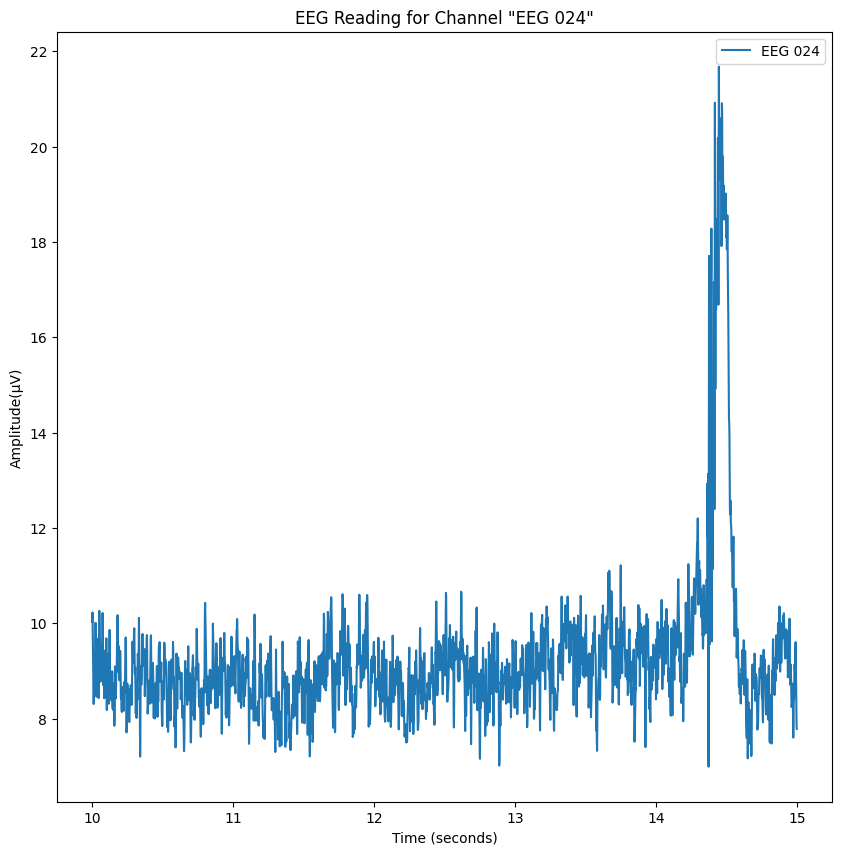

In [110]:
################################# CELL 5 ################################

# BELOW is for Students
# start_time = ....... 
# stop_time = ........ 
# channel_name = ...... 

# SOLUTION (DELETE BEFOFE THE ACTUAL EVENT)
start_time = 10 
stop_time = 15 
channel_name = "EEG 024" 


##### DON"T MODIFY CODE BELOW ######
start_stop_seconds = np.array([start_time, stop_time])
sampling_freq = raw.info["sfreq"]
start_sample, stop_sample = (start_stop_seconds * sampling_freq).astype(int)
selected_eeg = eeg_data_only[channel_name, start_sample:stop_sample]

time_x = selected_eeg[1]
eeg_amplitude_y = selected_eeg[0].T * 10**5 # Convert to micro Volts
###################################


######### CODE FOR PLOTTING ##########
# Create a figure object with a specific size
width = 10
height = 10
plt.figure(figsize=(width, height))
 
# BELOW is for Students
# plt.plot(..... , .....)
# # Plot Annotation
# plt.xlabel(....) # For STUDENTS to modify
# plt.ylabel(.)# For STUDENTS to modify
# plt.title(.....) # For STUDENTS to modify
# plt.legend(.......)
# plt.show()


# SOLUTION (DELETE BEFOFE THE ACTUAL EVENT)
plt.plot(time_x, eeg_amplitude_y) # For STUDENTS to modify
plt.xlabel('Time (seconds)') # For STUDENTS to modify
plt.ylabel('Amplitude(μV)')# For STUDENTS to modify
plt.title(f'EEG Reading for Channel "{channel_name}"') # For STUDENTS to modify
plt.legend([f"{channel_name}"])
plt.show()



### Challenge activity (OPTIONAL)!

Now that you have learnt to plot the data of a single channel, how about you try plotting the data of two channels at once!
You are welcome to choose any 2 channels of your liking and the same goes with the start and stop time specifications

Hint: 
- The code is similar to the single channel plot which you can reuse. However, it will need to be modified to complete this task
- Below is an example of what the plot should look like


![Advance Plot Example!](pics/Advance_plot.png)

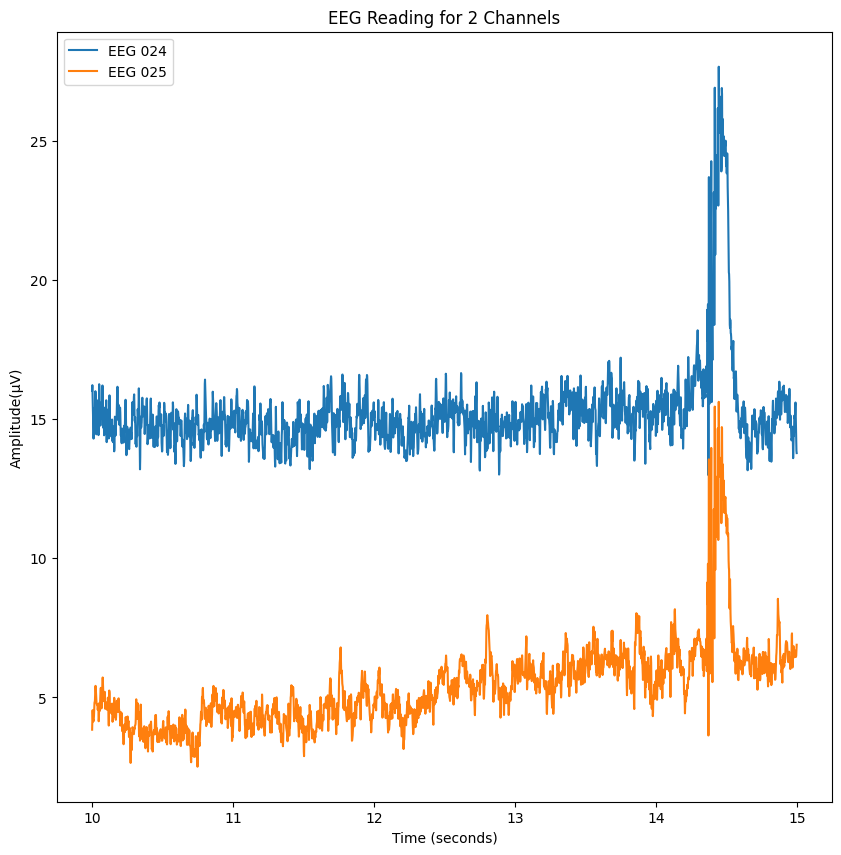

In [107]:
# SOLUTION FOR ADVANCE PLOTTING(DELETE BEFOFE THE ACTUAL EVENT)

start_time = 10 
stop_time = 15 


##### DON"T MODIFY CODE BELOW ######
start_stop_seconds = np.array([start_time, stop_time])
sampling_freq = raw.info["sfreq"]
start_sample, stop_sample = (start_stop_seconds * sampling_freq).astype(int)
selected_eeg = eeg_data_only[channel_name, start_sample:stop_sample]

time_x = selected_eeg[1]
eeg_amplitude_y = selected_eeg[0].T * 10**5 # Convert to micro Volts
###################################


width = 10
height = 10
plt.figure(figsize=(width, height))
channel_names = ["EEG 024", "EEG 025"]
two_eeg_chans = raw[channel_names, start_sample:stop_sample]
y_offset = np.array([6, 0])  # just enough to separate the channel traces
x = two_eeg_chans[1]
y = two_eeg_chans[0].T * 10**5 + y_offset
lines = plt.plot(x, y)
plt.legend(lines, channel_names)
plt.xlabel('Time (seconds)') # For STUDENTS to modify
plt.ylabel('Amplitude(μV)')# For STUDENTS to modify
plt.title(f'EEG Reading for 2 Channels') # For STUDENTS to modify
plt.legend(channel_names)
plt.show()

## Learning Objective 5 : Interpret The Data/plot (MAYBE DON"T INCLUDE THIS- Replace with Gideon's Work)????


Give example with images/ plot that explains a particular condition 



Context around the experiment:

In this experiment, checkerboard patterns were presented to the subject into the left and right visual field, interspersed by tones to the left or right ear. 

The interval between the stimuli was 750 ms. 
Occasionally a smiley face was presented at the center of the visual field. The subject was asked to press a key with the right index finger as soon as possible after the appearance of the face.


Your task:
- Take a look at the graph or plot you've made. What do you think it's telling us about the subject? Do you notice any patterns? You are welcome to type in your thoughts below in "CELL 6"
- I encourage you to chat with your friends about it! What do they think? Remember, scientists work together and share ideas. The more brains, the better!

In [ ]:
################################# CELL 6 ################################


# Congratulations, Brain Explorers! 🎉🎉

Your minds are officially blown! 🤯💥
You've just completed an incredible journey through the world of neuroscience! 🧠💡

From unraveling the mysteries of the brain to exploring the intricacies of neural networks, you've delved into the fascinating realm of neuroscience with enthusiasm and curiosity.

Your dedication and eagerness to learn have truly shone throughout this workshop, and we couldn't be prouder of your achievements.

As you continue your academic pursuits and personal growth, remember that the knowledge and skills you've gained here will serve as a solid foundation for your future endeavors.

Keep exploring, keep questioning, and keep pushing the boundaries of what you know. The world of neuroscience awaits your bright ideas and innovative discoveries!

Congratulations once again on completing the neuroscience workshop. We can't wait to see where your journey takes you next! 🚀🧠 #NeuroSTEM2024

![Congratz!](notebook_gif/mind_blown.gif)

![Congratz!](notebook_gif/big_brain.gif)

